In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from scipy import stats
import math as m
from astropy.cosmology import FlatLambdaCDM
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.lines as mlines

In [68]:
def colormap_setup(NCURVES, my_colormap):
        values = range(NCURVES)
        my_cmap = cm = plt.get_cmap(my_colormap)
        cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
        scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=my_cmap)

        colorVal = scalarMap.to_rgba(values)

        return colorVal

In [5]:
#def log_luminosity(z, m):
#    M = m - 5.*np.log10(cosmo.luminosity_distance(z).value) - 25. #- 5.*np.log10(cosmo.H0.value/100.) #units of h
#    L = -0.4*(M - Msun_i)
#    return L

In [6]:
def log_luminosity_h_units(z, m):
    M = m - 5.*np.log10(cosmo.luminosity_distance(z).value) - 25. - 5.*np.log10(cosmo.H0.value/100.) #units of h
    L = -0.4*(M - Msun_i)
    return L

In [2]:
def log_luminosity_Mrest(Mrest):
    L = -0.4*(Mrest - 5.*np.log10(cosmo.H0.value/100.)- Msun_i)
    return L

In [3]:
def bin_volume(z_bin_edge_lower, z_bin_edge_upper):
    chi_1 = cosmo.comoving_distance(z_bin_edge_lower)
    chi_2 = cosmo.comoving_distance(z_bin_edge_upper)
    Omega = 445./41253. * 4.*m.pi #LSST sims 445 sq degrees
    Vh = Omega/3.*(chi_2**3.-chi_1**3.)*(cosmo.H0.value/100.)**3.0 # volume units h^-3 Mpc^3
    return Vh

In [4]:
cosmo = FlatLambdaCDM(Om0=0.265, H0=71.0)
Msun_i = 4.52 #in the AB system

In [5]:
print(cosmo.H0.value/100)

0.71


## load galaxy samples and generate required luminosities

In [6]:
esample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/e_sample_for_Nz_imag_Mrest_included.npy')
nsample = np.load('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/read_catalog/n_sample_for_Nz_imag_Mrest_included.npy')

In [69]:
sz_e = esample[:,0]
pz_e = esample[:,1]
imag_e = esample[:,2]
Mrest_e = esample[:,3]

L_model_e = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/halo_model/e_sample_n_maxlike_photometric_LF_2/lum.txt')
LF_model_e = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/halo_model/e_sample_n_maxlike_photometric_LF_2/lf_l_photz.txt')

#L_model_e = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/halo_model/e_sample_maxlike_photometric_LF/lum.txt')
#LF_model_e = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/halo_model/e_sample_maxlike_photometric_LF/lf_l_photz.txt')

e_bin_edges = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/generate_nz/e_tomo_bin_edges.txt')

In [52]:
sz_n = nsample[:,0]
pz_n = nsample[:,1]
imag_n = nsample[:,2]
Mrest_n = nsample[:,3]

L_model_n = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/halo_model/n_sample_maxlike_photometric_LF_thesis_values/lum.txt')
LF_model_n = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/halo_model/n_sample_maxlike_photometric_LF_thesis_values/lf_l_photz.txt')

n_bin_edges = np.loadtxt('/global/u1/c/cmahony/Magnification_paper_cosmosis_inputs/generate_nz/n_tomo_bin_edges.txt')

In [10]:
#Lpz_n_h = log_luminosity_h_units(pz_n, imag_n)
#Lpz_e_h = log_luminosity_h_units(pz_e, imag_e)
Lpz_n_h = log_luminosity_Mrest(Mrest_n)
Lpz_e_h = log_luminosity_Mrest(Mrest_e)

## Halo model output and catalog luminosity function comparison

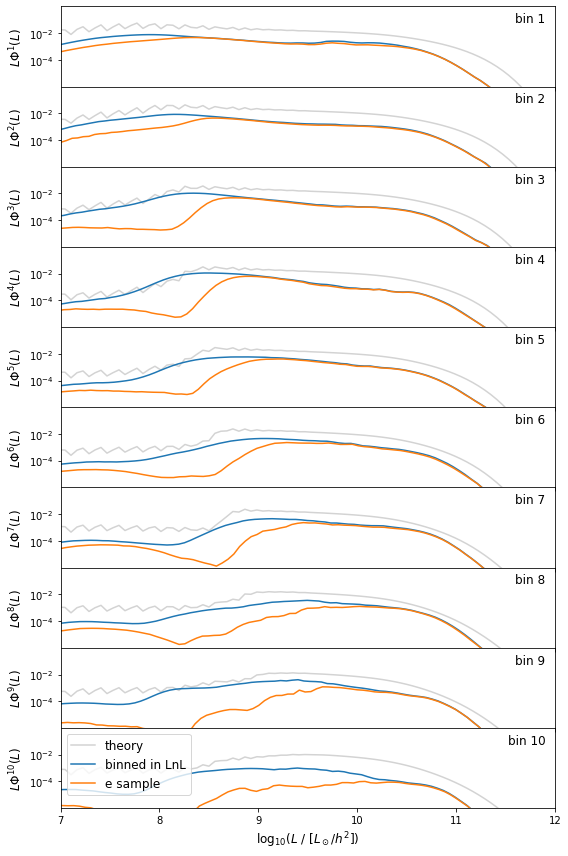

In [11]:
fig, ax = plt.subplots(10, 1, figsize=(8,12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

for i in np.arange(10):
    ax[i].plot(np.log10(L_model_n), L_model_n*LF_model_n[i], color='lightgrey', label='theory')
    
    V_bini = bin_volume(n_bin_edges[i], n_bin_edges[i+1]) #h^-3 Mpc^3
    #print(V_bini)
    
    heights, logLbin_edges = np.histogram(Lpz_n_h[(pz_n>=n_bin_edges[i]) & (pz_n<n_bin_edges[i+1])], bins=100)
    
    ax[i].plot(logLbin_edges[:-1], heights/V_bini, label='binned in LnL') 
    #ax[i].plot(logLbin_edges[:-1]+np.log10((cosmo.H0.value/100.)**(2.0)), heights/V_bini, label='binned in LnL with h^2 in L')
    
    heights_e, logLbin_edges_e = np.histogram(Lpz_e_h[(pz_e>=n_bin_edges[i]) & (pz_e<n_bin_edges[i+1])], bins=100)
    ax[i].plot(logLbin_edges_e[:-1], heights_e/V_bini, label='e sample') 
    
    ax[i].set_ylim(10**(-6), 1.0)
    ax[i].set_yscale('log')
    ax[i].set_xlim(7.,12.)
    ax[i].set_yticks([10**(-4.0),10**(-2.0)])
    ax[i].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12) #' \ / \ [h^3/Mpc^3]$'
    ax[i].text(11.9, 10**(-1.2),'bin '+str(i+1), horizontalalignment='right', fontsize=12)

ax[9].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
ax[9].legend(loc='upper left', fontsize=12)

plt.tight_layout()
#plt.legend(loc='upper left')
fig.subplots_adjust(hspace=0.0, wspace=0.0)

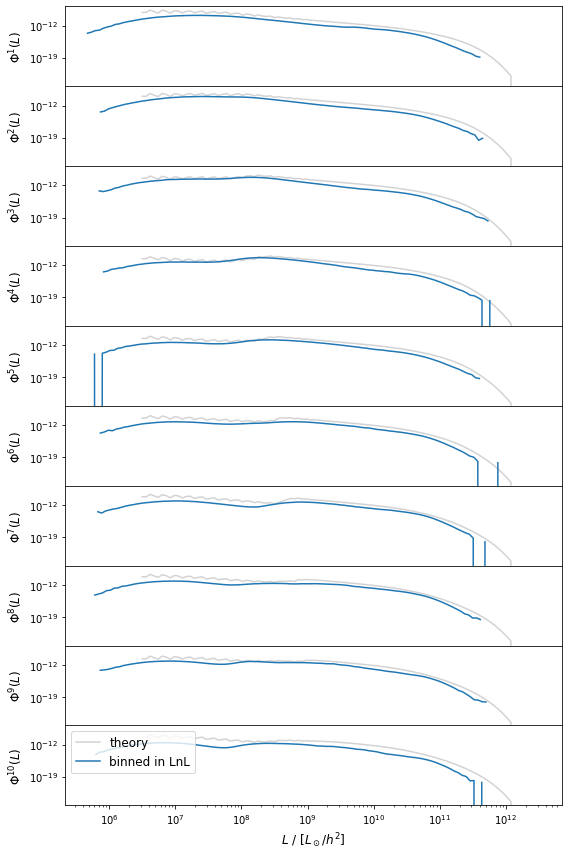

In [12]:
fig, ax = plt.subplots(10, 1, figsize=(8,12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

Lpz_n_h_not_log = 10**Lpz_n_h

for i in np.arange(10):
    ax[i].plot(L_model_n, LF_model_n[i], color='lightgrey', label='theory')
    
    V_bini = bin_volume(n_bin_edges[i], n_bin_edges[i+1]) #h^-3 Mpc^3
    #print(V_bini)
    
    #heights_L, L_bin_edges = np.histogram(Lpz_n_h_not_log[(pz_n>=n_bin_edges[i]) & (pz_n<n_bin_edges[i+1])], bins=100)
    #ax[i].plot(L_bin_edges[:-1], heights_L/V_bini, label='binned in L')
    
    heights, logLbin_edges = np.histogram(Lpz_n_h[(pz_n>=n_bin_edges[i]) & (pz_n<n_bin_edges[i+1])], bins=100)
    #ax[i].plot((cosmo.H0.value/100.)**(2.0)*10**logLbin_edges[:-1], (10**(-logLbin_edges[:-1]))*heights/(V_bini.value*(logLbin_edges[1]-logLbin_edges[0])), label='fudge', ls='--')
    #ax[i].plot(10**logLbin_edges[:-1], (10**(-logLbin_edges[:-1]))*heights/(V_bini.value*(logLbin_edges[1]-logLbin_edges[0])), label='fudge without h^2 in L', ls='--')
    #ax[i].plot((cosmo.H0.value/100.)**(2.0)*10**logLbin_edges[:-1], (10**(-logLbin_edges[:-1]))*heights/V_bini.value, label='fudge without bin width', ls='--')
    #ax[i].plot((cosmo.H0.value/100.)**(2.0)*10**logLbin_edges[:-1], heights/(V_bini.value*(logLbin_edges[1]-logLbin_edges[0])), label='fudge without multiplicative factor', ls='--')
    
    ax[i].plot(10**logLbin_edges[:-1], 10**(-logLbin_edges[:-1])*heights/V_bini, label='binned in LnL')  
    
    #ax[i].set_ylim(10**(-6), 1.0)
    #ax[i].set_yscale('log')
    #ax[i].set_xlim(7.,12.)
    #ax[i].set_yticks([10**(-4.0),10**(-2.0)])
    ax[i].set_ylabel('$\Phi^{' + str(i+1) + '}(L)$', fontsize=12) #\n \ / \ [h^5/L_\odot Mpc^3]$
    #ax[i].text(11.9, 10**(-1.2),'bin '+str(i+1), horizontalalignment='right', fontsize=12)
    ax[i].set_yscale('log')
    ax[i].set_xscale('log')

ax[9].set_xlabel('$L \ / \ [L_\odot/h^2]$', fontsize=12)
ax[9].legend(loc='upper left', fontsize=12)

plt.tight_layout()
#plt.legend(loc='upper left')
fig.subplots_adjust(hspace=0.0, wspace=0.0)

## Generate LF Datavector

In [39]:
data_bins = np.arange(6,12.4,0.4)

In [45]:
cmap=colormap_setup(10, 'viridis')

In [46]:
def generate_LF_datavector_full_L_range(L_pz, pz, tomo_bin_edges, LF_model, L_model):
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    datavector = np.zeros((10*15,2))
    L_datasets = [] #required for covariance
    pz_datasets = [] #required for covariance
    
    for i in np.arange(10):
        bini_mask = (pz >=tomo_bin_edges[i]) & (pz<tomo_bin_edges[i+1])
        tomo_bin = L_pz[bini_mask] 
        pz_bini = pz[bini_mask]
        L_datasets.append(tomo_bin)
        pz_datasets.append(pz_bini)
    
        # histogram the luminosity data
        heights, bins = np.histogram(tomo_bin, bins=data_bins)
        print(heights)
        V_bini = bin_volume(tomo_bin_edges[i], tomo_bin_edges[i+1]) ##convert datavector to form required by hod
        midpoints = bins + (bins[1]-bins[0])/2
        
        # convert histogrammed luminosity data to be the form output by the hod
        L_hod = 10**midpoints[:-1]
        LF_hod = 10**(-midpoints[:-1])*(heights/V_bini)
        datavector[i*15:(i+1)*15, 0] = L_hod
        datavector[i*15:(i+1)*15, 1] = LF_hod
        
        #plot to check output is comparable to hod theory
        ax[0].plot(midpoints[:-1], heights/V_bini, 'o', color=cmap[i])
        ax[1].plot(L_model, LF_model[i], ls='--', color='C1')
        ax[1].plot(L_hod, LF_hod, color='blue')
        
    ax[0].set_yscale('log')
    ax[0].set_xlim(5.0,12.5)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')

    ax[0].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12)
    ax[0].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
    
    ax[1].set_xlabel('L_halo')
    ax[1].set_ylabel('LF_halo')
    
    L_dataset = np.concatenate(np.array(L_datasets))
    pz_dataset = np.concatenate(np.array(pz_datasets))
    
    return datavector, L_dataset, pz_dataset

[   5071  112585  811105 2630201 4452170 3998082 2567091 1558779 1131348
 1412353 1101484  472253   48978     832       5]
[   1823   44397  407515 1522166 3326572 5318897 3735612 2052322 1237535
  967794  723101  343522   41646     999       4]
[   1034   21877  143929  440600 1513235 6047920 6023851 3082791 1572749
  868402  654444  308832   33699     783       9]
[    405    6987   32588   79755  458819 4151238 6839774 4620033 2043092
  815831  426109  225259   30325     489       5]
[    648    9302   38102   65008  171230 1710020 4922516 5553845 4074077
 2162663 1069564  451728   46834     812       3]
[    795   15561   72951  118188  157877  567654 2691165 6238857 5471699
 3586398 1653590  679037   78924     894       1]
[   1142   21929  106245  155502  106004  105390 1380882 5723338 5740583
 3328296 2037475  975983  110975    1042       1]
[   1582   28209  117643  157933  133250  490942 1431238 3229377 5849843
 4392344 2630569 1101513  115476     952       5]
[   2104   30457

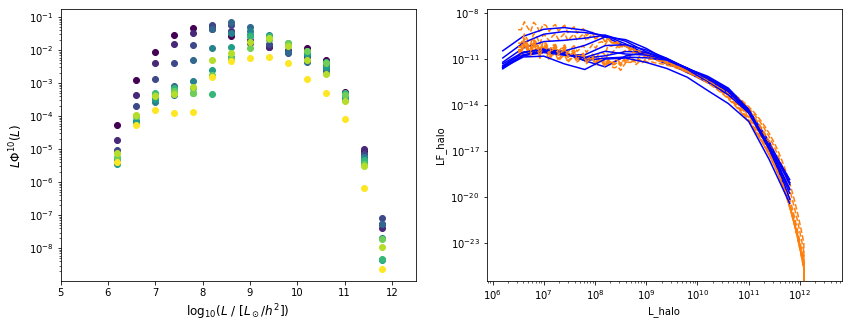

In [48]:
datavector_n, L_dataset_n, pz_dataset_n = generate_LF_datavector_full_L_range(Lpz_n_h, pz_n, n_bin_edges, LF_model_n, L_model_n)

[   1388   34064  232274  709873 1214712 1375200 1223714  797145  583732
  708909  507653  294119   34317     583       5]
[     20     867   19273  123364  523884 1801648 2151161 1175441  682687
  535428  437685  189130   24374     483       0]
[    347    5731   40639  127379  213471  488584 2503420 1961415 1090882
  819977  657497  309407   36338     932       6]
[    241    4192   13752   14666   10559   25685 1923870 2838331 1355960
  673340  527172  236894   26506     625       8]
[    185    2650    9931   12928    9963    5114 1025197 3557636 1858539
  708067  377388  223814   29073     535       4]
[    223    2662    9597   13492   11711    8212  291627 2315256 2783769
 1405541  754789  310105   31576     563       3]
[    249    4117   16756   21933   11398    9369   44080 1278697 2632332
 2277078 1259874  523591   56227     780       1]
[    216    4113   24109   44919   33041    8762    7004  570808 2809074
 2492386 1230306  448231   57529     619       0]
[    611   10706

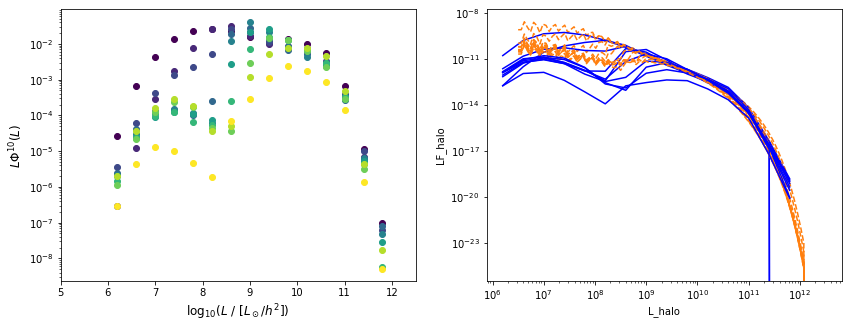

In [49]:
datavector_e, L_dataset_e, pz_dataset_e = generate_LF_datavector_full_L_range(Lpz_e_h, pz_e, e_bin_edges, LF_model_n, L_model_n) # do not currently have e sample theory prediction

In [122]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/n_sample_LF_datavector_full_L_range.txt', datavector_n)
np.savetxt('datavectors_cov_for_volume_complete_cuts/e_sample_LF_datavector_full_L_range.txt', datavector_e)

### load in datavectors

In [34]:
datavector_n = np.loadtxt('datavectors_cov_for_volume_complete_cuts/n_sample_LF_datavector_full_L_range.txt')
datavector_e = np.loadtxt('datavectors_cov_for_volume_complete_cuts/e_sample_LF_datavector_full_L_range.txt')

In [37]:
print(np.split(datavector_e,10)[1])

[[1.58489319e+06 1.81948523e-13]
 [3.98107171e+06 3.14005775e-12]
 [1.00000000e+07 2.77886763e-11]
 [2.51188643e+07 7.08120195e-11]
 [6.30957344e+07 1.19716407e-10]
 [1.58489319e+08 1.63903596e-10]
 [3.98107171e+08 7.79096859e-11]
 [1.00000000e+09 1.69480358e-11]
 [2.51188643e+09 3.91868334e-12]
 [6.30957344e+09 1.22354407e-12]
 [1.58489319e+10 3.98180696e-13]
 [3.98107171e+10 6.84981686e-14]
 [1.00000000e+11 3.51435270e-15]
 [2.51188643e+11 2.77246242e-17]
 [6.30957344e+11 0.00000000e+00]]


## Generate LF covariance

In [148]:
def compute_covariance_with_HOD_form_conversion(L_dataset, pz_dataset, tomo_bin_edges, number_of_samples):
    A = np.vstack((L_dataset, pz_dataset)).T
    sample_size = A.shape[0]
    
    sample_datavectors = np.zeros((10*15, number_of_samples))
    
    for j in np.arange(number_of_samples):
        sample = A[np.random.randint(A.shape[0], size=sample_size), :]
        L = sample[:,0]
        pz = sample[:,1]

        for i in np.arange(10):
            tomo_bin = L[(pz>=tomo_bin_edges[i]) & (pz<tomo_bin_edges[i+1])]
            heights, bins = np.histogram(tomo_bin, bins=data_bins)
            
            V_bini = bin_volume(tomo_bin_edges[i], tomo_bin_edges[i+1])
            midpoints = bins + (bins[1]-bins[0])/2
            LF_hod = 10**(-midpoints[:-1])*(heights/V_bini)
            
            sample_datavectors[i*15:(i+1)*15,j] = LF_hod
        
        
    variance_of_samples = np.var(sample_datavectors, axis=1)
    cov_non_zero = np.where(variance_of_samples != 0.0)[0]
    
    return variance_of_samples, cov_non_zero   

In [149]:
cov_vector_n_hod, cov_non_zero_n_hod = compute_covariance_with_HOD_form_conversion(L_dataset_n, pz_dataset_n, n_bin_edges, 100)

In [150]:
#np.savetxt('datavectors_cov_for_volume_complete_cuts/n_sample_non_zero_cov_indices.txt', np.reshape(cov_non_zero_n_hod, (1, 100)), delimiter=' ', fmt='%i')
np.savetxt('datavectors_cov_for_volume_complete_cuts/n_sample_cov.txt', cov_vector_n_hod)

In [151]:
cov_vector_e_hod, cov_non_zero_e_hod = compute_covariance_with_HOD_form_conversion(L_dataset_e, pz_dataset_e, e_bin_edges, 100)

In [152]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/e_sample_cov.txt', cov_vector_e_hod)

### load in covariances

In [4]:
cov_vector_n_hod = np.loadtxt('datavectors_cov_for_volume_complete_cuts/n_sample_cov.txt')
cov_vector_e_hod = np.loadtxt('datavectors_cov_for_volume_complete_cuts/e_sample_cov.txt')

## Volume complete cuts

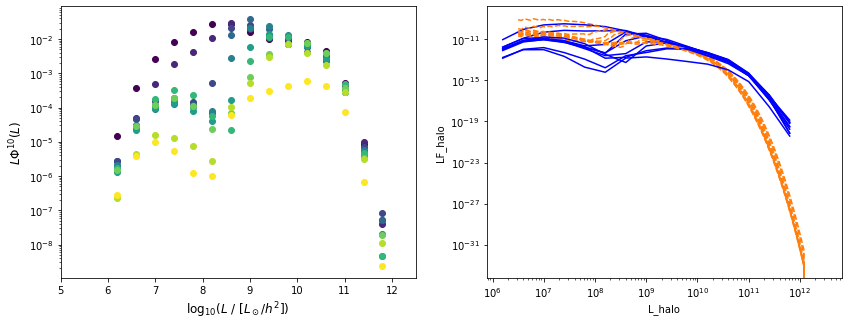

In [123]:
datavector_e_n_tomo_bins, L_dataset_e_n_tomo_bins, pz_dataset_e_n_tomo_bins = generate_LF_datavector_full_L_range(Lpz_e_h, pz_e, n_bin_edges, LF_model_n, L_model_n)

In [153]:
cov_vector_e_n_tomo_bins, cov_non_zero_e_n_tomo_bins = compute_covariance_with_HOD_form_conversion(L_dataset_e_n_tomo_bins, pz_dataset_e_n_tomo_bins, n_bin_edges, 100)

In [154]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_e_sample_cov_with_n_tomo_bins.txt', cov_vector_e_n_tomo_bins)

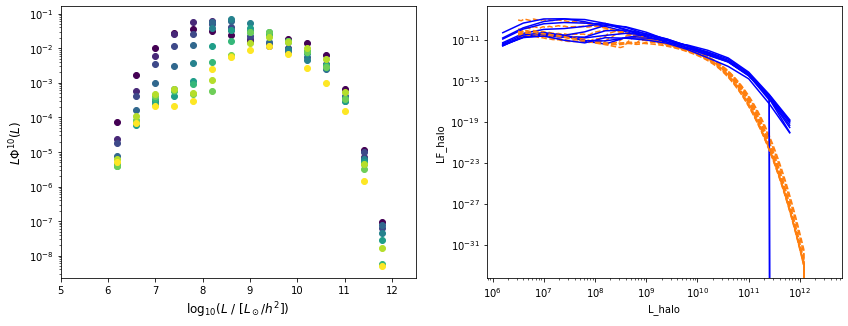

In [124]:
datavector_n_e_tomo_bins, L_dataset_n_e_tomo_bins, pz_dataset_n_e_tomo_bins = generate_LF_datavector_full_L_range(Lpz_n_h, pz_n, e_bin_edges, LF_model_n, L_model_n)

In [155]:
cov_vector_n_e_tomo_bins, cov_non_zero_n_e_tomo_bins = compute_covariance_with_HOD_form_conversion(L_dataset_n_e_tomo_bins, pz_dataset_n_e_tomo_bins, e_bin_edges, 100)

In [156]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_n_sample_cov_with_e_tomo_bins.txt', cov_vector_n_e_tomo_bins)

In [125]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_e_sample_LF_with_n_tomo_bins.txt', datavector_e_n_tomo_bins)
np.savetxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_n_sample_LF_with_e_tomo_bins.txt', datavector_n_e_tomo_bins)

### Load in datavectors and covariances for volume complete cuts

In [5]:
datavector_e_n_tomo_bins = np.loadtxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_e_sample_LF_with_n_tomo_bins.txt')
datavector_n_e_tomo_bins = np.loadtxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_n_sample_LF_with_e_tomo_bins.txt')

In [6]:
cov_vector_e_n_tomo_bins = np.loadtxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_e_sample_cov_with_n_tomo_bins.txt')
cov_vector_n_e_tomo_bins = np.loadtxt('datavectors_cov_for_volume_complete_cuts/volume_cuts_n_sample_cov_with_e_tomo_bins.txt')

### Find volume complete cuts

In [7]:
def find_volume_complete_cuts_for_datavector(datavector_L, datavector_LF, datavector_comparison_LF):
    frac_diff = abs(datavector_LF - datavector_comparison_LF)/datavector_LF
    frac_diff[np.isnan(frac_diff)] = 0
    frac_diff_split = np.split(frac_diff,10)
    
    cuts = np.zeros(10)
    L = np.split(datavector_L,10)[0]
    
    for i in np.arange(10): 
        index = next(x for x, val in enumerate(frac_diff_split[i]) if val < 0.2)
        cuts[i] = np.log10(L[index])
        
    return cuts  

In [8]:
cuts_n = find_volume_complete_cuts_for_datavector(datavector_n[:,0], datavector_n[:,1], datavector_e_n_tomo_bins[:,1])
print(cuts_n)

[ 8.6  9.   9.   9.4  9.4 10.2 10.2 10.6 10.6 10.6]


In [9]:
cuts_e = find_volume_complete_cuts_for_datavector(datavector_e[:,0], datavector_e[:,1], datavector_n_e_tomo_bins[:,1])
print(cuts_e)

[ 8.2  8.6  9.   9.   9.4  9.4 10.2 11.  10.6 10.6]


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


### Volume complete cuts plot

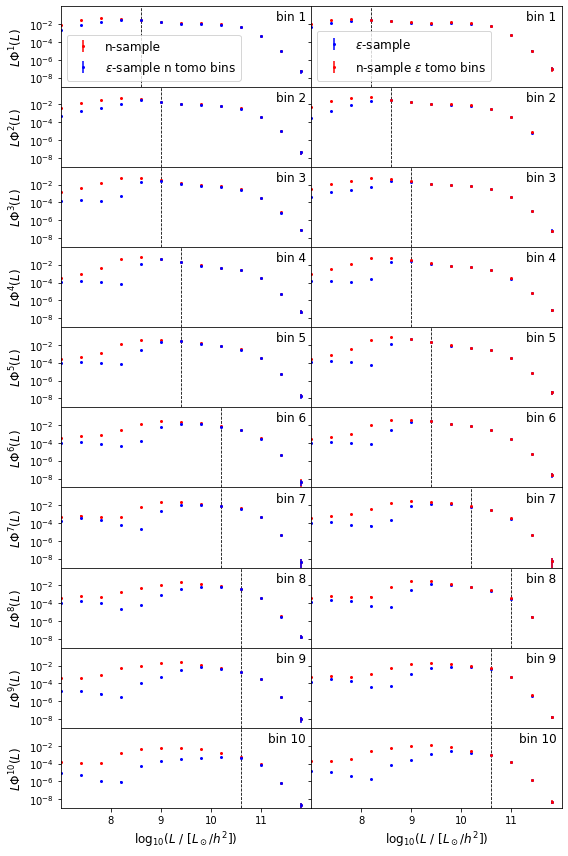

In [10]:
a
fig.subplots_adjust(hspace=0.0, wspace=0.0)

datavector_n_split_L = np.split(datavector_n[:,0],10)
datavector_n_split_LF = np.split(datavector_n[:,1],10)
stddev_n_split = np.split(np.sqrt(cov_vector_n_hod),10)

datavector_e_n_tomo_bins_split_L = np.split(datavector_e_n_tomo_bins[:,0],10) 
datavector_e_n_tomo_bins_split_LF = np.split(datavector_e_n_tomo_bins[:,1],10) 
stddev_e_n_tomo_bins_split = np.split(np.sqrt(cov_vector_e_n_tomo_bins),10)

datavector_e_split_L = np.split(datavector_e[:,0],10)
datavector_e_split_LF = np.split(datavector_e[:,1],10)
stddev_e_split = np.split(np.sqrt(cov_vector_e_hod),10)

datavector_n_e_tomo_bins_split_L = np.split(datavector_n_e_tomo_bins[:,0],10) 
datavector_n_e_tomo_bins_split_LF = np.split(datavector_n_e_tomo_bins[:,1],10)
stddev_n_e_tomo_bins_split = np.split(np.sqrt(cov_vector_n_e_tomo_bins),10)                              
                                             

for i in np.arange(10):
    ## without error bars
    #ax[i][0].plot(np.log10(datavector_n_split_L[i]), datavector_n_split_L[i]*datavector_n_split_LF[i], 'o', color='red', label='n-sample', ms=2)
    #ax[i][0].plot(np.log10(datavector_e_n_tomo_bins_split_L[i]), datavector_e_n_tomo_bins_split_L[i]*datavector_e_n_tomo_bins_split_LF[i],
    #              'o', color='blue', label='$\epsilon$-sample n tomo bins', ms=2)
    
    
    ## with errorbars
    ax[i][0].errorbar(np.log10(datavector_n_split_L[i]), datavector_n_split_L[i]*datavector_n_split_LF[i], 
                      yerr = datavector_n_split_L[i]*stddev_n_split[i], fmt='o', color='red', label='n-sample', ms=2)
    ax[i][0].errorbar(np.log10(datavector_e_n_tomo_bins_split_L[i]), datavector_e_n_tomo_bins_split_L[i]*datavector_e_n_tomo_bins_split_LF[i],
                  yerr = datavector_e_n_tomo_bins_split_L[i]*stddev_e_n_tomo_bins_split[i], fmt='o', color='blue', label='$\epsilon$-sample n tomo bins', ms=2)
    
    ax[i][0].axvline(cuts_n[i], color='k', ls='--', lw='0.8')
    
    ax[i][0].set_ylim(10**(-9), 1.0)
    ax[i][0].set_yscale('log')
    ax[i][0].set_xlim(7.,12.)
    ax[i][0].set_yticks([10**(-8.0),10**(-6.0),10**(-4.0),10**(-2.0)])
    ax[i][0].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12) #'\n$/[h^3/Mpc^3]$'
    ax[i][0].text(11.9, 10**(-1.6),'bin '+str(i+1), horizontalalignment='right', fontsize=12)

for i in np.arange(10):
    ## without errorbars
    #ax[i][1].plot(np.log10(datavector_e_split_L[i]), datavector_e_split_L[i]*datavector_e_split_LF[i], 'o', color='blue', 
    #              label='$\epsilon$-sample', ms=2)
    #ax[i][1].plot(np.log10(datavector_n_e_tomo_bins_split_L[i]), datavector_n_e_tomo_bins_split_L[i]*datavector_n_e_tomo_bins_split_LF[i], 
    #              'o', color='red', label='n-sample $\epsilon$ tomo bins', ms=2)
    
    ## with errorbars
    ax[i][1].errorbar(np.log10(datavector_e_split_L[i]), datavector_e_split_L[i]*datavector_e_split_LF[i], 
                      yerr = datavector_e_split_L[i]*stddev_e_split[i], fmt='o', color='blue', label='$\epsilon$-sample', ms=2)
    ax[i][1].errorbar(np.log10(datavector_n_e_tomo_bins_split_L[i]), datavector_n_e_tomo_bins_split_L[i]*datavector_n_e_tomo_bins_split_LF[i],
                      yerr = datavector_n_e_tomo_bins_split_L[i]*stddev_n_e_tomo_bins_split[i], fmt='o', color='red', label='n-sample $\epsilon$ tomo bins', ms=2)
    
    ax[i][1].axvline(cuts_e[i], color='k', ls='--', lw='0.8')
    
    ax[i][1].set_ylim(10**(-9), 1.0)
    ax[i][1].set_yscale('log')
    ax[i][1].set_xlim(7.,12.)
    ax[i][1].set_yticks([10**(-8.0),10**(-6.0),10**(-4.0),10**(-2.0)])
    #ax[i][1].set_yticks([10**(-4.0),10**(-2.0)])
    #ax[i][1].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12) #'\n$/[h^3/Mpc^3]$'
    ax[i][1].text(11.9, 10**(-1.6),'bin '+str(i+1), horizontalalignment='right', fontsize=12)

ax[9][0].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
ax[9][0].set_xticks([8., 9., 10., 11.])
ax[0][0].legend(loc='lower left', fontsize=12)

ax[9][1].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
ax[9][1].set_xticks([8., 9., 10., 11.])
ax[0][1].legend(loc='lower left', fontsize=12)

## zoom
#ax[0][0].set_ylim(10**(-3), 10**(-1))
#ax[0][0].set_xlim(7.,9.)

plt.tight_layout()
#plt.legend(loc='upper left')
fig.subplots_adjust(hspace=0.0, wspace=0.0)
#plt.savefig('datavectors_cov_for_volume_complete_cuts/volume_complete_cuts_plot_for_thesis.pdf')

In [96]:
x_n = np.log10(datavector_n_split_L[0])
y_e = datavector_e_split_LF[7]
y_n_e = datavector_n_e_tomo_bins_split_LF[7]
y_n_sigma = datavector_n_split_L[0]*stddev_n_split[0]

diff = y_e - y_n_e
frac_diff = abs(diff)/y_e

print(x_n)
print(diff)
print(frac_diff)
#print(y_n_sigma)
#print(diff/y_n_sigma)

[ 6.2  6.6  7.   7.4  7.8  8.2  8.6  9.   9.4  9.8 10.2 10.6 11.  11.4
 11.8]
[-1.81451416e-12 -1.53235716e-11 -2.81608276e-11 -1.46661514e-11
 -4.63196959e-12 -3.36717348e-12 -1.60398174e-11 -2.65446526e-11
 -5.82123878e-12 -5.08192512e-13 -8.06351917e-14 -1.46106339e-14
 -5.10546508e-16 -2.25289650e-19  0.00000000e+00]
[2.58796296e+00 2.88305373e+00 2.27047990e+00 1.59418064e+00
 1.71934869e+00 1.18389637e+01 1.77216733e+02 9.03937576e+00
 1.01182098e+00 2.50071618e-01 2.01912370e-01 2.52242705e-01
 1.72504302e-01 1.77705977e-02            nan]


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in true_divide


## Cut datavector

In [64]:
def cut_datavector_and_cov(datavector, cov_vector, cuts):
    ## cut to 10 L bins
    datavector_10_L_bins = np.delete(datavector, (np.where(np.log10(datavector[:,0])<8.2)), axis=0)
    print(len(datavector),len(datavector_10_L_bins))
    ## cut cov to 10 L bins
    cov_vector_10_L_bins = np.delete(cov_vector, (np.where(np.log10(datavector[:,0])<8.2)), axis=0)
    print(len(cov_vector), len(cov_vector_10_L_bins))

    ## set datavector LF to zero before volume complete cut
    datavector_10_L_bins_split = np.split(datavector_10_L_bins,10)
    
    for i in np.arange(10):
        index_of_cut = np.where(np.log10(datavector_10_L_bins_split[i][:,0])==cuts[i])[0]
        datavector_10_L_bins_split[i][:,1][:int(index_of_cut)] = 0.0
        
    cut_datavector = np.concatenate(datavector_10_L_bins_split)
    
    ## find indexes where datavector is non-zero, needed for likelihood module
    datavector_non_zero = np.where(cut_datavector[:,1] != 0.0)
      
    return cut_datavector, cov_vector_10_L_bins, datavector_non_zero 

In [65]:
datavector_n_vol_cuts, cov_n_vol_cuts, datavector_n_non_zero = cut_datavector_and_cov(datavector_n, cov_vector_n_hod, cuts_n)

150 100
150 100


In [74]:
datavector_e_vol_cuts, cov_e_vol_cuts, datavector_e_non_zero = cut_datavector_and_cov(datavector_e, cov_vector_e_hod, cuts_e)

150 100
150 100


In [79]:
#print(cov_vector_e_hod)
#print(cov_e_vol_cuts)
#print(datavector_e)
#print(datavector_e_vol_cuts)

In [80]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/n_sample_LF_datavector_cut_L_range_for_cosmosis.txt', datavector_n_vol_cuts)
np.savetxt('datavectors_cov_for_volume_complete_cuts/e_sample_LF_datavector_cut_L_range_for_cosmosis.txt', datavector_e_vol_cuts)

In [81]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/n_sample_cov_cut_L_range_for_cosmosis.txt', cov_n_vol_cuts)
np.savetxt('datavectors_cov_for_volume_complete_cuts/e_sample_cov_cut_L_range_for_cosmosis.txt', cov_e_vol_cuts)

In [87]:
print(len(datavector_n_non_zero[0]))
print(len(datavector_e_non_zero[0]))

61
63


In [88]:
np.savetxt('datavectors_cov_for_volume_complete_cuts/n_sample_non_zero_datavector_indices.txt',
           np.reshape(datavector_n_non_zero, (1, len(datavector_n_non_zero[0]))), delimiter=' ', fmt='%i')
np.savetxt('datavectors_cov_for_volume_complete_cuts/e_sample_non_zero_datavector_indices.txt',
           np.reshape(datavector_e_non_zero, (1, len(datavector_e_non_zero[0]))), delimiter=' ', fmt='%i')

### Load cut datavector

In [15]:
datavector_n_vol_cuts = np.loadtxt('datavectors_cov_for_volume_complete_cuts/n_sample_LF_datavector_cut_L_range_for_cosmosis.txt')
datavector_e_vol_cuts = np.loadtxt('datavectors_cov_for_volume_complete_cuts/e_sample_LF_datavector_cut_L_range_for_cosmosis.txt')

### Load 10 bin covariance

In [18]:
cov_n_vol_cuts = np.loadtxt('datavectors_cov_for_volume_complete_cuts/n_sample_cov_cut_L_range_for_cosmosis.txt')
cov_e_vol_cuts = np.loadtxt('datavectors_cov_for_volume_complete_cuts/e_sample_cov_cut_L_range_for_cosmosis.txt')

## Plot cut datavector against hod LF from maxlike fiducial values

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),)
(array([2, 3, 4, 5, 6, 7, 8, 9]),)
(array([2, 3, 4, 5, 6, 7, 8, 9]),)
(array([3, 4, 5, 6, 7, 8, 9]),)
(array([3, 4, 5, 6, 7, 8, 9]),)
(array([5, 6, 7, 8, 9]),)
(array([5, 6, 7, 8, 9]),)
(array([6, 7, 8, 9]),)
(array([6, 7, 8, 9]),)
(array([6, 7, 8, 9]),)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)
(array([1, 2, 3, 4, 5, 6, 7, 8]),)
(array([2, 3, 4, 5, 6, 7, 8, 9]),)
(array([2, 3, 4, 5, 6, 7, 8, 9]),)
(array([3, 4, 5, 6, 7, 8, 9]),)
(array([3, 4, 5, 6, 7, 8, 9]),)
(array([5, 6, 7, 8, 9]),)
(array([7, 8]),)
(array([6, 7, 8, 9]),)
(array([6, 7, 8, 9]),)


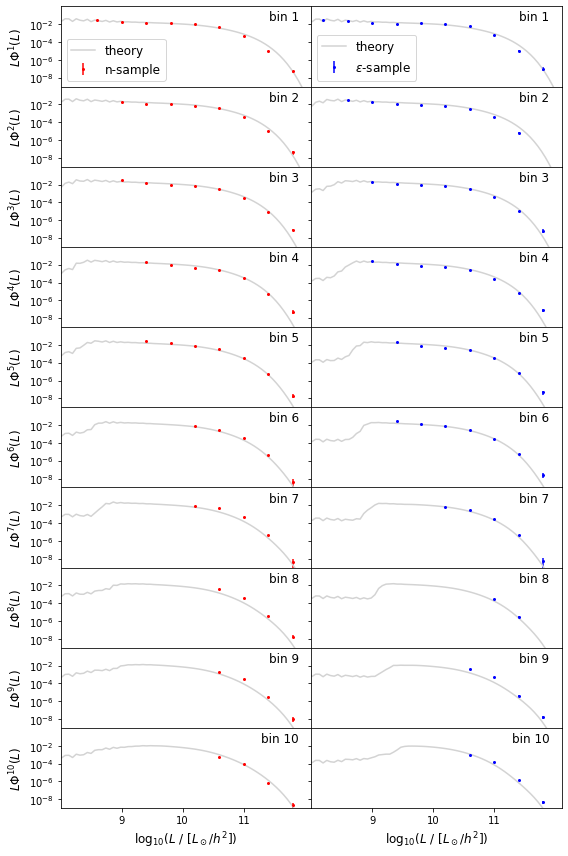

In [71]:
fig, ax = plt.subplots(10, 2, figsize=(8,12), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

datavector_n_vol_cuts_split_L = np.split(datavector_n_vol_cuts[:,0],10)
datavector_n_vol_cuts_split_LF = np.split(datavector_n_vol_cuts[:,1],10)
stddev_n_vol_cuts_split = np.split(np.sqrt(cov_n_vol_cuts),10)

datavector_e_vol_cuts_split_L = np.split(datavector_e_vol_cuts[:,0],10)
datavector_e_vol_cuts_split_LF = np.split(datavector_e_vol_cuts[:,1],10)
stddev_e_vol_cuts_split = np.split(np.sqrt(cov_e_vol_cuts),10)


for i in np.arange(10):
    
    ax[i][0].plot(np.log10(L_model_n), L_model_n*LF_model_n[i], color='lightgrey', label='theory')
    
    n_indices_to_plot = np.where(datavector_n_vol_cuts_split_LF[i]!=0.0)
    print(n_indices_to_plot)
    
    L_n = datavector_n_vol_cuts_split_L[i][n_indices_to_plot]
    LF_n = datavector_n_vol_cuts_split_LF[i][n_indices_to_plot]
    sigma_n = stddev_n_vol_cuts_split[i][n_indices_to_plot]
    
    ax[i][0].errorbar(np.log10(L_n), L_n*LF_n, yerr = L_n*sigma_n, fmt='o', color='red', label='n-sample', ms=2)
      
    ax[i][0].set_ylim(10**(-9), 1.0)
    ax[i][0].set_yscale('log')
    ax[i][0].set_xlim(8.,12.)
    ax[i][0].set_yticks([10**(-8.0),10**(-6.0),10**(-4.0),10**(-2.0)])
    ax[i][0].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12) #'\n$/[h^3/Mpc^3]$'
    ax[i][0].text(11.9, 10**(-1.6),'bin '+str(i+1), horizontalalignment='right', fontsize=12)

for i in np.arange(10):
    
    ax[i][1].plot(np.log10(L_model_e), L_model_e*LF_model_e[i], color='lightgrey', label='theory')
    #ax[i][1].plot(np.log10(L_model_n), L_model_n*LF_model_n[i], color='C0', label='n theory')
    
    e_indices_to_plot = np.where(datavector_e_vol_cuts_split_LF[i]!=0.0)
    print(e_indices_to_plot)
    
    L_e = datavector_e_vol_cuts_split_L[i][e_indices_to_plot]
    LF_e = datavector_e_vol_cuts_split_LF[i][e_indices_to_plot]
    sigma_e = stddev_e_vol_cuts_split[i][e_indices_to_plot]
    
    ax[i][1].errorbar(np.log10(L_e), L_e*LF_e, yerr = L_e*sigma_e, fmt='o', color='blue', label='$\epsilon$-sample', ms=2)
    
    ax[i][1].set_ylim(10**(-9), 1.0) #-9
    ax[i][1].set_yscale('log')
    ax[i][1].set_xlim(8.,12.1) #12.
    ax[i][1].set_yticks([10**(-8.0),10**(-6.0),10**(-4.0),10**(-2.0)])
    #ax[i][1].set_yticks([10**(-4.0),10**(-2.0)])
    #ax[i][1].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12) #'\n$/[h^3/Mpc^3]$'
    ax[i][1].text(11.9, 10**(-1.6),'bin '+str(i+1), horizontalalignment='right', fontsize=12)

ax[9][0].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
ax[9][0].set_xticks([9., 10., 11.])
ax[0][0].legend(loc='lower left', fontsize=12)

ax[9][1].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
ax[9][1].set_xticks([9., 10., 11.])
ax[0][1].legend(loc='lower left', fontsize=12)

## zoom
#ax[0][0].set_ylim(10**(-3), 10**(-1))
#ax[0][0].set_xlim(7.,9.)

plt.tight_layout()
#plt.legend(loc='upper left')
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.savefig('datavectors_cov_for_volume_complete_cuts/LF_comparison_plot_for_thesis_with_e_theory.pdf')

## Volume complete cuts old (kept for comparison)

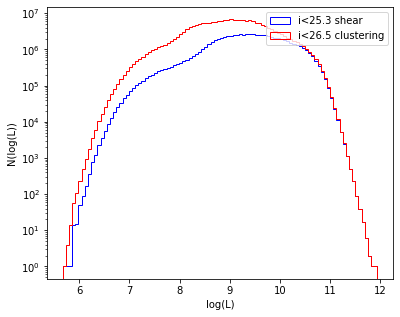

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(6.2,5))
be = ax.hist(Lpz_e_h, bins=100, histtype='step', fill=False, edgecolor='blue', label='i<25.3 shear')
bn = ax.hist(Lpz_n_h, bins=100, histtype='step', fill=False, edgecolor='red', label='i<26.5 clustering')
ax.set_xlabel('log(L)')
ax.set_ylabel('N(log(L))')
ax.set_yscale('log')
ax.legend()

In [46]:
hist_bins = np.arange(6,12.4,0.4) #np.arange(6, 14.1, 0.1)
print(hist_bins)
midpoints = np.arange(6.2, 12.2, 0.4)
print(midpoints)

[ 6.   6.4  6.8  7.2  7.6  8.   8.4  8.8  9.2  9.6 10.  10.4 10.8 11.2
 11.6 12. ]
[ 6.2  6.6  7.   7.4  7.8  8.2  8.6  9.   9.4  9.8 10.2 10.6 11.  11.4
 11.8]


In [100]:
def generate_volume_complete_cuts(tomo_bin_edges):
    cuts = np.zeros(10)
    fig, ax = plt.subplots(10, 1, figsize=(4,12), sharex=True)
    fig.subplots_adjust(hspace=0.0, wspace=0.0)
    
    for i in np.arange(10):
        heights_e, bins_e = np.histogram(Lpz_e_h[(pz_e>=tomo_bin_edges[i]) & (pz_e<tomo_bin_edges[i+1])], bins=hist_bins)
        heights_n, bins_n = np.histogram(Lpz_n_h[(pz_n>=tomo_bin_edges[i]) & (pz_n<tomo_bin_edges[i+1])], bins=hist_bins)
        
        V_bini = bin_volume(tomo_bin_edges[i], tomo_bin_edges[i+1])
        LF_n = 10**(-midpoints)*(heights_n/V_bini)
        LF_e = 10**(-midpoints)*(heights_e/V_bini)
        
        diff = abs(LF_n - LF_e)/LF_e
        diff[np.isnan(diff)] = 0
              
        #find luminsoity cut
        #index_a = next(x for x, val in enumerate(diff[::-1]) if val > 0.1) # 10**(-3.0))
        #index = len(diff)-index_a
        
        index = next(x for x, val in enumerate(diff) if val < 0.2) # 10**(-3.0))
        cuts[i] = midpoints[index]
        print(midpoints[index])
                         
        ax[i].plot(midpoints, heights_e/V_bini, 'o', color='blue', label='$\epsilon$-sample')
        ax[i].plot(midpoints, heights_n/V_bini, 'o', color='red', label='n-sample')
        ax[i].axvline(midpoints[index])
        
        ax[i].set_yscale('log')
        ax[i].set_xlim(7.0,12.0)
        #ax[i].set_ylim(bottom=10.0**(-4.0))
        ax[i].set_ylim(10**(-6), 1.0)
        ax[i].set_yticks([10.0**(-4.0), 10.0**(-3.0), 10.0**(-2.0)])
        ax[i].set_ylabel('$L\Phi^{' + str(i+1) + '}(L)$', fontsize=12)
        ax[i].set_xlabel('$\log_{10}(L \ / \ [L_\odot/h^2])$', fontsize=12)
        ax[i].text(7.05, 10**(-3.75),'bin '+str(i+1), fontsize=12)
        
    plt.tight_layout()
    plt.legend(loc='upper left', fontsize=12)
    fig.subplots_adjust(hspace=0.0, wspace=0.0)
    #plt.savefig('n_sample_volume_cuts.pdf')
        
    return cuts

In [ ]:
8.6  9.   9.   9.4  9.4 10.2 10.2 10.6 10.6 10.6

8.600000000000001
9.000000000000004
10.200000000000003
10.200000000000003
10.200000000000003
11.400000000000006
11.000000000000004
10.600000000000005
10.600000000000005
11.000000000000004
[ 8.6  9.  10.2 10.2 10.2 11.4 11.  10.6 10.6 11. ]


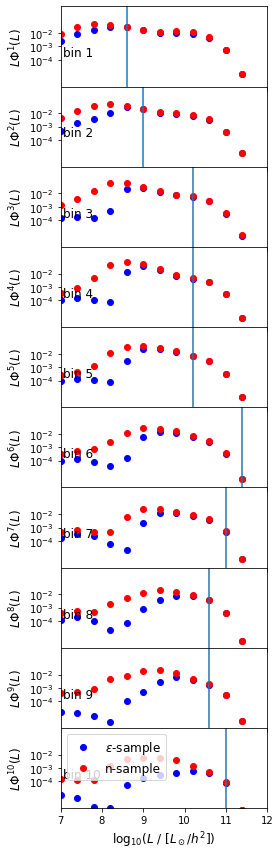

In [49]:
cuts_n = generate_volume_complete_cuts(n_bin_edges)
print(cuts_n)

8.200000000000003


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/astropy/units/quantity.py:464: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


8.600000000000001
9.000000000000004
9.000000000000004
9.400000000000002
9.400000000000002
10.200000000000003


/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v1/envs/desc/lib/python3.7/site-packages/astropy/units/quantity.py:464: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


11.000000000000004
10.600000000000005
10.600000000000005
[ 8.2  8.6  9.   9.   9.4  9.4 10.2 11.  10.6 10.6]


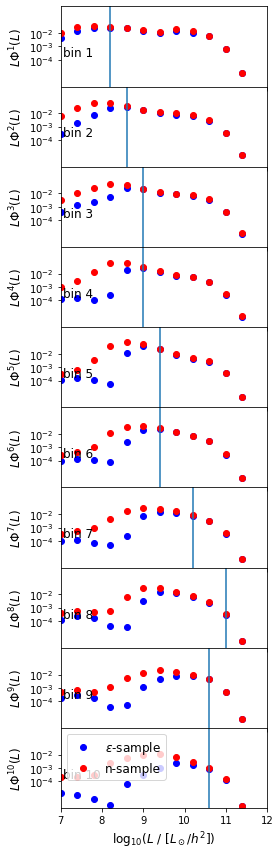

In [101]:
cuts_e = generate_volume_complete_cuts(e_bin_edges)
print(cuts_e)

## Generate LF Datavector old

In [23]:
def generate_LF_datavector(L_pz, pz, tomo_bin_edges, LF_model, L_model, vol_cuts):
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    datavector = np.zeros((10*10,2))
    L_datasets = [] #required for covariance
    pz_datasets = [] #required for covariance
    
    for i in np.arange(10): 
        # cut luminosity data to be volume complete and within tomographic bin i
        ###################################### ADD VOL CUTS BACK IN
        #bini_mask = (L_pz >= vol_cuts[i]) & (pz >=tomo_bin_edges[i]) & (pz<tomo_bin_edges[i+1]) #################
        bini_mask = (pz >=tomo_bin_edges[i]) & (pz<tomo_bin_edges[i+1])
        tomo_bin = L_pz[bini_mask] 
        pz_bini = pz[bini_mask]
        L_datasets.append(tomo_bin)
        pz_datasets.append(pz_bini)
    
        # histogram the luminosity data
        heights, bins = np.histogram(tomo_bin, bins=data_bins)
        V_bini = bin_volume(tomo_bin_edges[i], tomo_bin_edges[i+1]) ##convert datavector to form required by hod
        midpoints = bins + (bins[1]-bins[0])/2
        
        # convert histogrammed luminosity data to be the form output by the hod
        L_hod = 10**midpoints[:-1]
        LF_hod = 10**(-midpoints[:-1])*(heights/V_bini)
        datavector[i*10:(i+1)*10, 0] = L_hod
        datavector[i*10:(i+1)*10, 1] = LF_hod
        
        #plot to check output is comparable to hod theory
        ax[0].plot(midpoints[:-1], heights, color=cmap[i])
        ax[1].plot(L_model, LF_model[i], ls='--', color='C1')
        ax[1].plot(L_hod, LF_hod, color='blue')
        
    ax[0].set_yscale('log')
    ax[0].set_xlim(5.0,12.5)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')

    ax[0].set_xlabel('log(L)')
    ax[0].set_ylabel('N(log(L))')
    ax[1].set_xlabel('L_halo')
    ax[1].set_ylabel('LF_halo')
    
    L_dataset = np.concatenate(np.array(L_datasets))
    pz_dataset = np.concatenate(np.array(pz_datasets))
    
    return datavector, L_dataset, pz_dataset

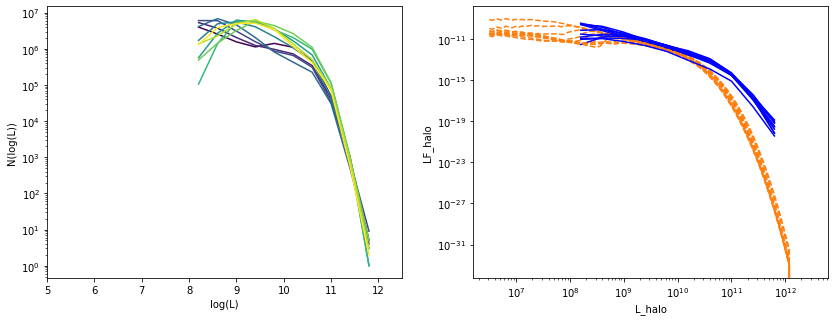

In [24]:
datavector_n, L_dataset_n, pz_dataset_n = generate_LF_datavector(Lpz_n_h, pz_n, n_bin_edges, LF_model_n, L_model_n, cuts_n)

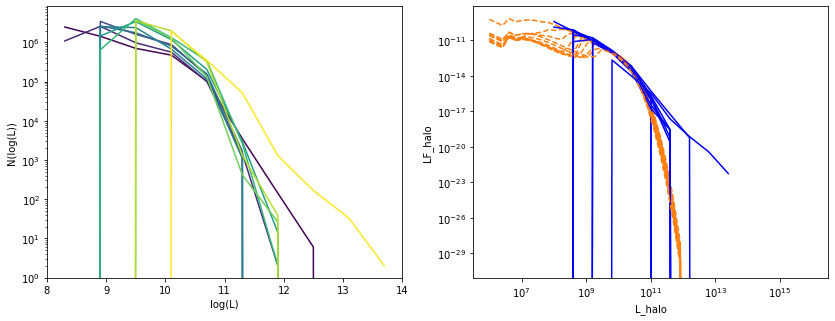

In [19]:
datavector_e, L_dataset_e, pz_dataset_e = generate_LF_datavector(Lpz_e_h, pz_e, e_bin_edges, LF_model_e, L_model_e, cuts_e)

In [97]:

#np.savetxt('non_zero_covariance_vector_indices_e_sample.txt', np.reshape(cov_non_zero_e, (1, 59)), delimiter=' ', fmt='%i')
#np.savetxt('LF_covariance_vector_form_of_hod_e_sample.txt', cov_vector_e)

In [38]:
cov_matrix_n = np.diag(cov_vector_n, k=0)
#np.savetxt('LF_covariance_form_of_hod.txt', cov_matrix_n)
#cov_matrix_e = np.diag(cov_vector_e, k=0)
#np.savetxt('LF_covariance_form_of_hod.txt', cov_matrix_n)

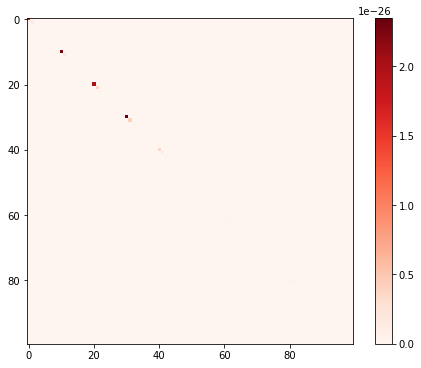

In [40]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
a = ax.imshow(cov_matrix_n, cmap='Reds')
cbar = plt.colorbar(a)
plt.show()

## Volume complete cut criterion

In [25]:
cov_vector_n = np.loadtxt('n_sample_LF_covariance_vector_form_of_hod.txt')

In [37]:
error = np.split(np.sqrt(cov_vector_n),10)
print(error)

[array([1.27035445e-13, 3.69611383e-14, 1.47836449e-14, 4.22996465e-15,
       1.97321718e-15, 7.30179358e-16, 1.93134837e-16, 1.95438127e-17,
       1.21650500e-18, 3.79136299e-20]), array([1.50711327e-13, 4.24447083e-14, 1.25903105e-14, 4.63220587e-15,
       1.68327947e-15, 4.79291669e-16, 1.59097255e-16, 2.11374421e-17,
       1.14174628e-18, 3.26582897e-20]), array([1.41696933e-13, 6.20836098e-14, 1.53010667e-14, 4.77152289e-15,
       1.37304961e-15, 4.97746533e-16, 1.38760073e-16, 1.69421671e-17,
       1.07631038e-18, 4.30779718e-20]), array([1.53287788e-13, 6.57109417e-14, 2.53447253e-14, 6.05415154e-15,
       1.47553440e-15, 4.11997418e-16, 1.21437195e-16, 1.55189465e-17,
       9.74609497e-19, 3.42601085e-20]), array([6.05058371e-14, 3.51572170e-14, 1.67048553e-14, 5.32643543e-15,
       1.64395335e-15, 4.75606235e-16, 1.21877588e-16, 1.62611329e-17,
       7.96865738e-19, 2.11868558e-20]), array([2.03959130e-14, 1.88784473e-14, 1.16068969e-14, 3.96506080e-15,
       1.2863

In [35]:
fractional_error = np.split(np.sqrt(cov_vector_n)/datavector_n[:,1],10)
print(fractional_error)

[array([0.00046983, 0.00053478, 0.00088484, 0.00087621, 0.00082243,
       0.00098021, 0.00151898, 0.00372285, 0.03426556, 0.44636756]), array([4.41202584e-04, 4.44401510e-04, 6.02704835e-04, 9.23727975e-04,
       1.07816949e-03, 1.03208307e-03, 1.81143129e-03, 4.98646610e-03,
       2.82044640e-02, 5.06112636e-01]), array([0.00039228, 0.00043346, 0.00052435, 0.00080508, 0.00105392,
       0.00127344, 0.00188967, 0.00531122, 0.03647695, 0.31904758]), array([5.51525045e-04, 3.60438567e-04, 5.16984860e-04, 7.01456396e-04,
       1.07543570e-03, 1.44413935e-03, 2.02257619e-03, 4.82277211e-03,
       4.71799085e-02, 4.07430976e-01]), array([8.08434198e-04, 4.09898138e-04, 4.33608269e-04, 4.73430274e-04,
       6.91431612e-04, 1.01598982e-03, 1.54844374e-03, 5.00539250e-03,
       3.55367509e-02, 6.42382717e-01]), array([1.26175722e-03, 6.18788591e-04, 4.12218471e-04, 4.03314655e-04,
       5.01451754e-04, 6.89722886e-04, 1.13357920e-03, 4.02475352e-03,
       3.81948370e-02, 9.58331884e-0

low luminsoity points, where I would be cutting, have a fractional error of order 10^(-4). Want cut to be larger than the noise, 10^(-3)?